In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_pickle("./data/pink-floyd-tracks-and-lyrics.pkl")

album_years = df[["album", "year"]].groupby(by=["album"]).first()
df.head()

,track_id,instrumental,lyrics,album,position,title,year,bpm,key,length
0,0a8e306a70,True,,The Endless River,1,Things Left Unsaid,2014,84,D#,266
1,2a14b70199,True,,The Endless River,2,It's What We Do,2014,144,Em,377
2,129cbef07e,True,,The Endless River,3,Ebb and Flow,2014,80,C,115
3,0d8b215b70,True,,The Endless River,4,Sum,2014,112,Em,288
4,d7b94a6211,True,,The Endless River,5,Skins,2014,124,A,157


## Album Duration

How has the album duration changed over the years?

### Total album length over the years

<AxesSubplot: xlabel='year', ylabel='length'>

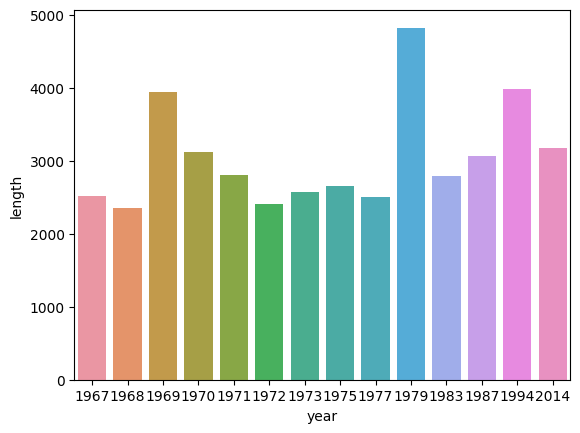

In [2]:
album_durations = df[["album", "length"]].groupby(by=["album"]).sum()
albums = album_years.join(album_durations, on="album").sort_values(by="year")
sb.barplot(albums, x="year", y="length", errorbar=None)

### Average track length over the years

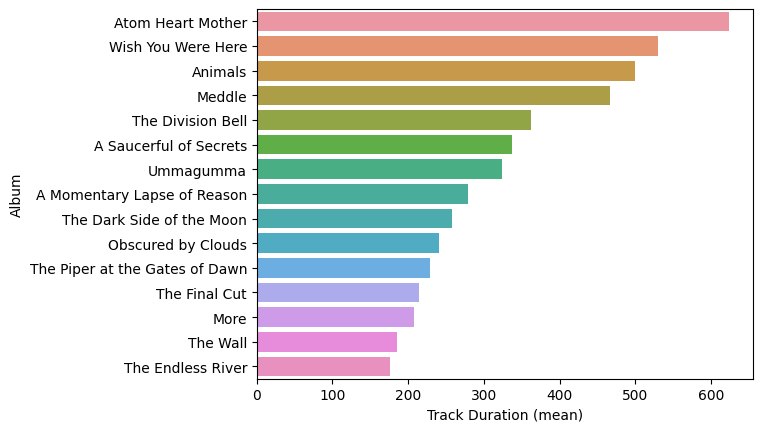

In [3]:
albums = df[["album", "length"]].groupby(by=["album"]).mean().sort_values(by="length", ascending=False).reset_index()
ax = sb.barplot(albums, y="album", x="length", errorbar=None)
ax.set(ylabel="Album", xlabel="Track Duration (mean)")
plt.show(ax)

## Tempo

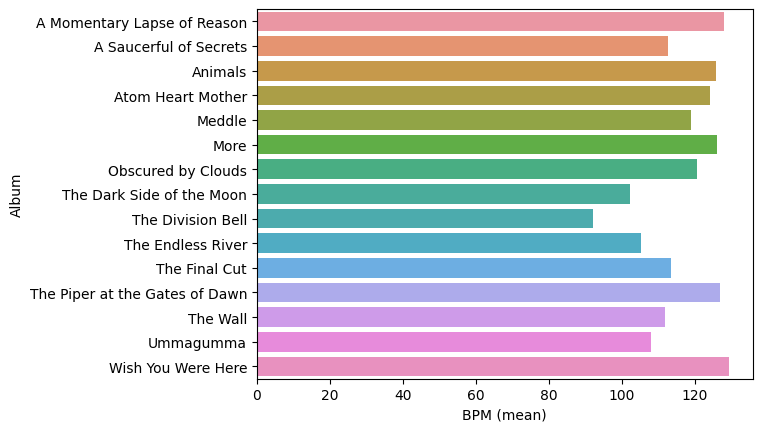

In [4]:
albums = df[["album", "bpm"]].groupby(by=["album"]).mean().reset_index()
albums = albums.join(album_years, on="album")

ax = sb.barplot(albums, y="album", x="bpm", errorbar=None)
ax.set(ylabel="Album", xlabel="BPM (mean)")
plt.show(ax)

## Sentiment

In [6]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

def polarity(row):
    if row.lyrics:
        doc = nlp(row.lyrics)
        return doc._.blob.polarity

def subjectivity(row):
    if row.lyrics:
        doc = nlp(row.lyrics)
        return doc._.blob.subjectivity

df["polarity"] = df.apply(polarity, axis=1)
df["subjectivity"] = df.apply(subjectivity, axis=1)
df.head(30)

,track_id,instrumental,lyrics,album,position,title,year,bpm,key,length,polarity,subjectivity
0,0a8e306a70,True,,The Endless River,1,Things Left Unsaid,2014,84,D#,266,NaN,NaN
1,2a14b70199,True,,The Endless River,2,It's What We Do,2014,144,Em,377,NaN,NaN
2,129cbef07e,True,,The Endless River,3,Ebb and Flow,2014,80,C,115,NaN,NaN
3,0d8b215b70,True,,The Endless River,4,Sum,2014,112,Em,288,NaN,NaN
4,d7b94a6211,True,,The Endless River,5,Skins,2014,124,A,157,NaN,NaN
5,fcd9c13b8a,True,,The Endless River,6,Unsung,2014,129,C,67,NaN,NaN
6,e8efe1a9e2,True,,The Endless River,7,Anisina,2014,143,C,196,NaN,NaN
7,cb48c3b9c7,True,,The Endless River,8,The Lost Art of Conversation,2014,90,C#m,102,NaN,NaN
8,f3250f8fbe,True,,The Endless River,9,On Noodle Street,2014,105,C#m,102,NaN,NaN
9,5aaa315d37,True,,The Endless River,10,Night Light,2014,130,Cm,102,NaN,NaN


In [7]:
df.to_pickle("./data/pink-floyd-tracks-and-lyrics-sentiment.pkl")

### Album sentiment

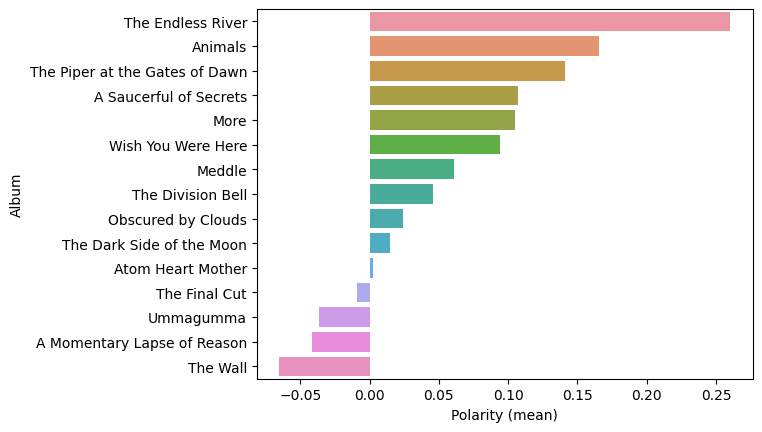

In [8]:
data = df[["album", "polarity"]].groupby(by=["album"]).mean().sort_values(by="polarity", ascending=False).reset_index()

ax = sb.barplot(data, y="album", x="polarity", errorbar=None)
ax.set(ylabel="Album", xlabel="Polarity (mean)")
plt.show(ax)

So it appears most albums are toward the positive side of sentiment with The Endless River being the most positive and The Wall being the most negative. Let's take a look at the different keys.

In [14]:
keys = df.groupby(by=["key"]).size().sort_values(ascending=False).reset_index()
keys

,key,0
0,G,31
1,C,23
2,A,21
3,D,21
4,Em,11
5,Am,9
6,F,8
7,Bm,7
8,Gm,6
9,E,5
